In [1]:
import numpy as np
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *

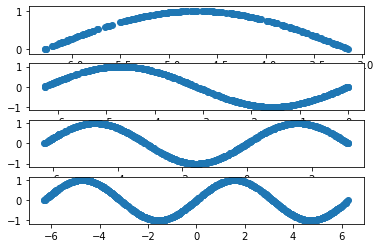

In [2]:
#creating sin data
import random
inputvals=[]
outputvals=[]

for i in range(0,4):
    for j in range(0,250):
        x=random.uniform(-2*math.pi + i*math.pi,-1*math.pi+i*math.pi)
        inputvals.append(x)
        y=math.sin(x)
        outputvals.append(y)
    plt.subplot(4,1,i+1)
    plt.scatter(inputvals,outputvals) 



In [3]:
# test values
test=[]
for j in range(0,300):
        test.append(random.uniform(-2*math.pi,2*math.pi))
        

In [4]:
# layers_dims = [1,275,175,50,1] #  4-layer 
# layers_dims = [1,80,40,20,1] #  4-layer model

train_x=np.array(inputvals).reshape(1,1000)
train_y=np.array(outputvals).reshape(1,1000)

Cost after epoch 0: 0.275640
Cost after epoch 1: 0.187787
Cost after epoch 2: 0.149698
Cost after epoch 3: 0.122920
Cost after epoch 4: 0.106186
Cost after epoch 5: 0.083211
Cost after epoch 6: 0.074586
Cost after epoch 7: 0.066756
Cost after epoch 8: 0.059835
Cost after epoch 9: 0.055532
Cost after epoch 10: 0.052501
Cost after epoch 11: 0.047803
Cost after epoch 12: 0.045636
Cost after epoch 13: 0.043706
Cost after epoch 14: 0.043389
Cost after epoch 15: 0.041617
Cost after epoch 16: 0.040996
Cost after epoch 17: 0.039921
Cost after epoch 18: 0.039127
Cost after epoch 19: 0.038393
Cost after epoch 20: 0.038191
Cost after epoch 21: 0.037487
Cost after epoch 22: 0.037126
Cost after epoch 23: 0.036900
Cost after epoch 24: 0.036078
Cost after epoch 25: 0.035844
Cost after epoch 26: 0.035679
Cost after epoch 27: 0.035300
Cost after epoch 28: 0.035136
Cost after epoch 29: 0.034951
Cost after epoch 30: 0.034541
Cost after epoch 31: 0.034460
Cost after epoch 32: 0.034074
Cost after epoch 33:

Cost after epoch 268: 0.022859
Cost after epoch 269: 0.022866
Cost after epoch 270: 0.022853
Cost after epoch 271: 0.022858
Cost after epoch 272: 0.022854
Cost after epoch 273: 0.022861
Cost after epoch 274: 0.022850
Cost after epoch 275: 0.022853
Cost after epoch 276: 0.022852
Cost after epoch 277: 0.022852
Cost after epoch 278: 0.022849
Cost after epoch 279: 0.022849
Cost after epoch 280: 0.022848
Cost after epoch 281: 0.022857
Cost after epoch 282: 0.022844
Cost after epoch 283: 0.022835
Cost after epoch 284: 0.022854
Cost after epoch 285: 0.022849
Cost after epoch 286: 0.022851
Cost after epoch 287: 0.022847
Cost after epoch 288: 0.022844
Cost after epoch 289: 0.022852
Cost after epoch 290: 0.022835
Cost after epoch 291: 0.022849
Cost after epoch 292: 0.022834
Cost after epoch 293: 0.022844
Cost after epoch 294: 0.022840
Cost after epoch 295: 0.022845
Cost after epoch 296: 0.022833
Cost after epoch 297: 0.022842
Cost after epoch 298: 0.022843
Cost after epoch 299: 0.022839
Cost aft

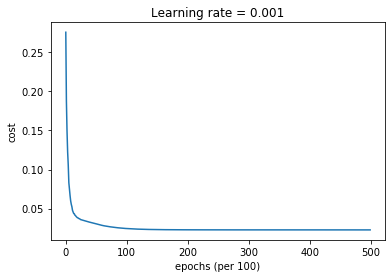

In [15]:
layers_dims = [1,20,20,1] #  3-layer model


parameters = L_layer_model_minib(train_x, train_y, layers_dims, valid=False, num_iterations = 500,learning_rate = 0.001, 
                            print_cost = True,lambd=0.1,optimizer="momentum", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,
                            activation='tanh',regularisation='none',mini_batch_size=1,cost_func="mse",he_init=True)

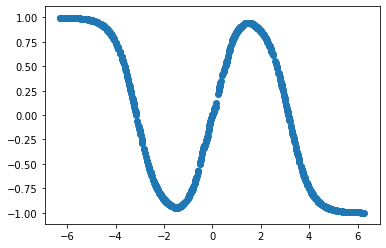

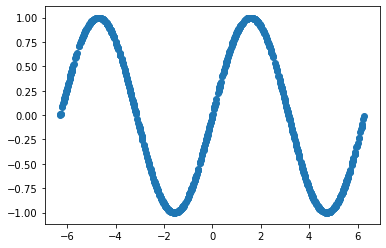

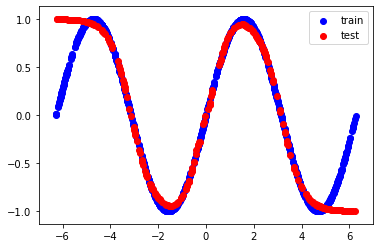

84.52903031959225


In [16]:
pred_train = predictvals(train_x, parameters,activation='tanh')
plt.scatter(train_x[0],pred_train[0])
plt.show()
plt.scatter(train_x[0],train_y[0])
plt.show()

test_x=np.array(test).reshape(1,300)
pred_test = predictvals(test_x, parameters,activation='tanh')

plt.scatter(train_x[0],train_y[0],color='blue')
plt.scatter(test_x[0],pred_test[0],color='red')
plt.legend(['train','test'])
plt.show()

mape=predicterr(train_x,train_y,parameters,lambd=0.1,activation='tanh',regularisation='none',cost_func="mape")
print(mape)

Cost after epoch 0: 0.412880
Cost after epoch 1: 0.217210
Cost after epoch 2: 0.183517
Cost after epoch 3: 0.167944
Cost after epoch 4: 0.145299
Cost after epoch 5: 0.129364
Cost after epoch 6: 0.113084
Cost after epoch 7: 0.101017
Cost after epoch 8: 0.091293
Cost after epoch 9: 0.080999
Cost after epoch 10: 0.073504
Cost after epoch 11: 0.065880
Cost after epoch 12: 0.059376
Cost after epoch 13: 0.053725
Cost after epoch 14: 0.047396
Cost after epoch 15: 0.044682
Cost after epoch 16: 0.040319
Cost after epoch 17: 0.037080
Cost after epoch 18: 0.034982
Cost after epoch 19: 0.032943
Cost after epoch 20: 0.032087
Cost after epoch 21: 0.030748
Cost after epoch 22: 0.029902
Cost after epoch 23: 0.029586
Cost after epoch 24: 0.027966
Cost after epoch 25: 0.027420
Cost after epoch 26: 0.027216
Cost after epoch 27: 0.026126
Cost after epoch 28: 0.026630
Cost after epoch 29: 0.025882
Cost after epoch 30: 0.025292
Cost after epoch 31: 0.024741
Cost after epoch 32: 0.025720
Cost after epoch 33:

Cost after epoch 275: 0.010625
Cost after epoch 276: 0.010596
Cost after epoch 277: 0.010266
Cost after epoch 278: 0.010134
Cost after epoch 279: 0.010466
Cost after epoch 280: 0.010066
Cost after epoch 281: 0.010103
Cost after epoch 282: 0.011404
Cost after epoch 283: 0.011098
Cost after epoch 284: 0.010038
Cost after epoch 285: 0.010781
Cost after epoch 286: 0.010112
Cost after epoch 287: 0.009631
Cost after epoch 288: 0.008894
Cost after epoch 289: 0.009673
Cost after epoch 290: 0.009377
Cost after epoch 291: 0.009669
Cost after epoch 292: 0.009550
Cost after epoch 293: 0.008879
Cost after epoch 294: 0.008530
Cost after epoch 295: 0.008957
Cost after epoch 296: 0.008711
Cost after epoch 297: 0.008546
Cost after epoch 298: 0.009755
Cost after epoch 299: 0.009409
Cost after epoch 300: 0.008413
Cost after epoch 301: 0.007834
Cost after epoch 302: 0.008216
Cost after epoch 303: 0.009292
Cost after epoch 304: 0.009335
Cost after epoch 305: 0.007387
Cost after epoch 306: 0.007659
Cost aft

Cost after epoch 544: 0.000831
Cost after epoch 545: 0.000674
Cost after epoch 546: 0.000727
Cost after epoch 547: 0.000619
Cost after epoch 548: 0.000640
Cost after epoch 549: 0.000593
Cost after epoch 550: 0.000756
Cost after epoch 551: 0.000727
Cost after epoch 552: 0.000707
Cost after epoch 553: 0.000823
Cost after epoch 554: 0.000666
Cost after epoch 555: 0.000731
Cost after epoch 556: 0.000684
Cost after epoch 557: 0.000581
Cost after epoch 558: 0.000779
Cost after epoch 559: 0.000842
Cost after epoch 560: 0.000942
Cost after epoch 561: 0.000619
Cost after epoch 562: 0.000977
Cost after epoch 563: 0.000667
Cost after epoch 564: 0.000883
Cost after epoch 565: 0.000875
Cost after epoch 566: 0.000761
Cost after epoch 567: 0.000627
Cost after epoch 568: 0.000543
Cost after epoch 569: 0.000645
Cost after epoch 570: 0.000654
Cost after epoch 571: 0.000637
Cost after epoch 572: 0.000921
Cost after epoch 573: 0.000658
Cost after epoch 574: 0.000590
Cost after epoch 575: 0.000633
Cost aft

Cost after epoch 814: 0.000595
Cost after epoch 815: 0.000664
Cost after epoch 816: 0.000817
Cost after epoch 817: 0.000932
Cost after epoch 818: 0.000908
Cost after epoch 819: 0.000739
Cost after epoch 820: 0.000547
Cost after epoch 821: 0.000661
Cost after epoch 822: 0.001097
Cost after epoch 823: 0.000728
Cost after epoch 824: 0.000703
Cost after epoch 825: 0.000583
Cost after epoch 826: 0.001329
Cost after epoch 827: 0.000768
Cost after epoch 828: 0.000665
Cost after epoch 829: 0.000523
Cost after epoch 830: 0.000660
Cost after epoch 831: 0.000685
Cost after epoch 832: 0.000607
Cost after epoch 833: 0.000556
Cost after epoch 834: 0.000748
Cost after epoch 835: 0.001064
Cost after epoch 836: 0.000646
Cost after epoch 837: 0.000688
Cost after epoch 838: 0.000611
Cost after epoch 839: 0.000556
Cost after epoch 840: 0.000645
Cost after epoch 841: 0.000784
Cost after epoch 842: 0.000666
Cost after epoch 843: 0.000902
Cost after epoch 844: 0.001284
Cost after epoch 845: 0.000722
Cost aft

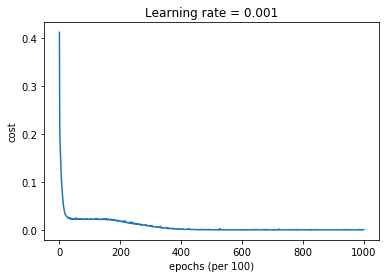

In [12]:
layers_dims = [1,20,20,1] #  3-layer model


parameters = L_layer_model_minib(train_x, train_y, layers_dims, valid=False, num_iterations = 1000,learning_rate = 0.001, 
                            print_cost = True,lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,
                            activation='tanh',regularisation='none',mini_batch_size=32,cost_func="mse",he_init=True)

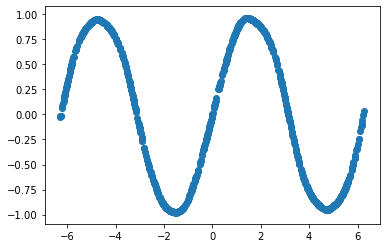

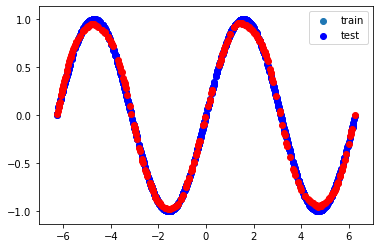

8.25254188135935


In [14]:
pred_train = predictvals(train_x, parameters,activation='tanh')
plt.scatter(train_x[0],pred_train[0])
plt.show()
plt.scatter(train_x[0],train_y[0])
plt.show

test_x=np.array(test).reshape(1,300)
pred_test = predictvals(test_x, parameters,activation='tanh')

plt.scatter(train_x[0],train_y[0],color='blue')
plt.scatter(test_x[0],pred_test[0],color='red')
plt.legend(['train','test'])
plt.show()

mape=predicterr(train_x,train_y,parameters,lambd=0.1,activation='tanh',regularisation='none',cost_func="mape")
print(mape)